In [2]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
from glob import glob
import numpy as np
import matplotlib
import seaborn as sns
import PIL
PIL.Image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import sys
import json
import pandas as pd
import cvlib as cv
from cvlib.object_detection import draw_bbox

#### 통제환경 training 데이터 10만여장, 216개 폴더 
#### validation 데이터 1만2500여장, 27개 폴더

# json 파일 불러오기

In [58]:
file_path = 'C:/Users/82106/Documents/ds_study/source_code/DL project/001_G1_json/'

with open(file_path+"001_G1_01_무광원_계기판_정상주시_20200917_182234_02144.json", encoding='utf-8') as f:
    data = json.load(f)
    print(data)
    print(data['UserInfo'])
    print(data['Accessory'])
    print(data['FileInfo']['FileName'])

{'ObjectInfo': {'KeyPoints': {'Points': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Count': 0}, 'BoundingBox': {'Cigar': {'isVisible': False, 'Position': [0, 0, 0, 0]}, 'Leye': {'isVisible': True, 'Position': [291, 665, 373, 706], 'Opened': True}, 'Face': {'isVisible': True, 'Position': [245, 628, 551, 904]}, 'Phone': {'isVisible': False, 'Position': [0, 0, 0, 0]}, 'Reye': {'isVisible': True, 'Position': [418, 660, 499, 701], 'Opened': True}, 'Mouth': {'isVisible': True, 'Position': [351, 815, 450, 848], 'Opened': False}}}, 'FileInfo': {'Width': 800, 'Height': 1280, 'Channel': 1, 'FileName': '001_G1_01_무광원_계기판_정상주

In [46]:
datas = pd.Series(data)

In [71]:
datas[3]

{'Cap': False, 'Glasses': False, 'Mask': False}

In [3]:
def load_CIFAR10(path):
    
    path = path
    images = []
    jsons = []
    for filename in glob(path +"*"):
        #print(filename)
        for img in glob(filename):
            #print(img)
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to training_images
    images = np.array(images)

    return images

In [6]:
training_images = load_CIFAR10(path='C:/Users/82106/Documents/ds_study/source_code/DL project/001_G1/')

In [13]:
print("train 이미지 크기:", training_images.shape)


train 이미지 크기: (486, 1280, 800)


In [62]:
path = 'C:/Users/82106/Documents/ds_study/source_code/DL project/001_G1_json/'
file_list = os.listdir(path)


In [65]:
file_list

['001_G1_01_무광원_계기판_정상주시_20200917_182234_02144.json',
 '001_G1_01_무광원_계기판_정상주시_20200917_182234_02150.json',
 '001_G1_01_무광원_계기판_졸음재현_20200917_182234_02293.json',
 '001_G1_01_무광원_계기판_졸음재현_20200917_182234_02298.json',
 '001_G1_01_무광원_계기판_하품재현_20200917_182234_02459.json',
 '001_G1_01_무광원_계기판_하품재현_20200917_182234_02464.json',
 '001_G1_01_무광원_네비게이션_정상주시_20200917_182234_03130.json',
 '001_G1_01_무광원_네비게이션_정상주시_20200917_182234_03154.json',
 '001_G1_01_무광원_네비게이션_졸음재현_20200917_182234_03298.json',
 '001_G1_01_무광원_네비게이션_졸음재현_20200917_182234_03315.json',
 '001_G1_01_무광원_네비게이션_하품재현_20200917_182234_03446.json',
 '001_G1_01_무광원_네비게이션_하품재현_20200917_182234_03451.json',
 '001_G1_01_무광원_룸미러_정상주시_20200917_182234_02649.json',
 '001_G1_01_무광원_룸미러_정상주시_20200917_182234_02655.json',
 '001_G1_01_무광원_룸미러_졸음재현_20200917_182234_02803.json',
 '001_G1_01_무광원_룸미러_졸음재현_20200917_182234_02812.json',
 '001_G1_01_무광원_룸미러_하품재현_20200917_182234_02929.json',
 '001_G1_01_무광원_룸미러_하품재현_20200917_182234_02934.json',
 '001_G1_01_무광원_

## opencv로 내 화면 띄우기

In [12]:
# 비디오 파일 열기
cap = cv2.VideoCapture('output.avi')

if not cap.isOpened():
    print("Video open failed!")
    sys.exit()

# 비디오 프레임 크기, 전체 프레임수, FPS 등 출력
print('Frame width:', int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height:', int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('Frame count:', int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

fps = cap.get(cv2.CAP_PROP_FPS)
print('FPS:', fps)

delay = round(1000 / fps)

# 비디오 매 프레임 처리
while True:
    ret, frame = cap.read()

    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #cv2.imshow('frame', frame)
    cv2.imshow('gray', gray)

    if cv2.waitKey(delay) == 27: #동영상 파일을 실행할때는 적절한 delay값을 세팅해 주는 것이 좋다.
        break

cap.release()
cv2.destroyAllWindows()

Frame width: 640
Frame height: 480
Frame count: 422
FPS: 30.0


# 웹캠 열기

In [17]:
!pip install cvlib

     --------------------------------------- 13.1/13.1 MB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 3.4/3.4 MB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046369 sha256=494153d7814be3b99c57bc6f2203a1f20a0be2ac082ca8eaf4c369feb0aa3ba4
  Stored in directory: c:\users\82106\appdata\local\pip\cache\wheels\a3\be\11\36bb5a50bc8505f801c11290b47998895ac45683baccf7cdb5
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25847 sha256=87f26e7d88aedcf3a3e30111e2a2f2c336bc5bde76d111b6d721bab12fd869d1
  Stored in directory: c:\users\82106\appdata\local\pip\cache\wheels\e2\73\ca\f8ea71e39a18de34c287a665e

In [6]:
# open webcam (웹캠 열기)
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()
    

# loop through frames
while webcam.isOpened():
    
    # read frame from webcam 
    status, frame = webcam.read()

    if not status:
        break

    # apply object detection (물체 검출)
    bbox, label, conf = cv.detect_common_objects(frame)

    print(bbox, label, conf)

    # draw bounding box over detected objects (검출된 물체 가장자리에 바운딩 박스 그리기)
    out = draw_bbox(frame, bbox, label, conf, write_conf=True)

    # display output
    cv2.imshow("Real-time object detection", out)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
# release resources
webcam.release()
cv2.destroyAllWindows()   

[[116, 44, 631, 484]] ['person'] [0.9574626088142395]
[[109, 47, 634, 483], [0, 0, 126, 482]] ['person', 'refrigerator'] [0.9768824577331543, 0.9209743738174438]
[[104, 50, 644, 486], [0, -1, 126, 479]] ['person', 'refrigerator'] [0.9805471897125244, 0.5953842997550964]
[[107, 53, 642, 485], [0, 0, 126, 480]] ['person', 'refrigerator'] [0.9741248488426208, 0.6148974895477295]
[[107, 53, 640, 485]] ['person'] [0.9719663262367249]
[[115, 54, 635, 484], [0, 0, 128, 479]] ['person', 'refrigerator'] [0.968273937702179, 0.5488635897636414]
[[116, 55, 636, 483], [0, 1, 126, 477]] ['person', 'refrigerator'] [0.9727455377578735, 0.6461178660392761]
[[113, 53, 634, 485], [0, -3, 126, 483]] ['person', 'refrigerator'] [0.9670803546905518, 0.7288601398468018]
[[107, 55, 644, 483], [0, 0, 126, 480]] ['person', 'refrigerator'] [0.9713690876960754, 0.8328954577445984]
[[112, 60, 643, 481], [0, 2, 126, 479]] ['person', 'refrigerator'] [0.9735875129699707, 0.5748019218444824]


# 얼굴 검출

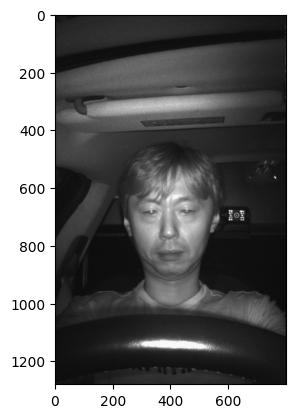

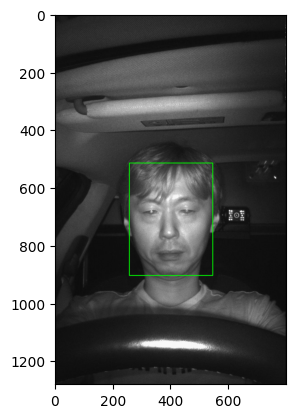

True

In [22]:
image_path = '/Users/82106/Documents/ds_study/source_code/DL project/001_G1_01.jpg'
im = cv2.imread(image_path) # 이미지 읽기
plt.imshow(im)
plt.show()

# detect faces (얼굴 검출)
faces, confidences = cv.detect_face(im)

# loop through detected faces and add bounding box (검출된 얼굴을 박스로 감싸기)
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    # draw rectangle over face
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)

# display output        
plt.imshow(im)
plt.show()
cv2.imwrite('result.jpg', im) # 이미지 쓰기

## 얼굴과 눈 검출

In [1]:
font = cv2.FONT_ITALIC
 
def faceDetect():
    eye_detect = False
    face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")  # 얼굴찾기 haar 파일
    eye_cascade = cv2.CascadeClassifier("./haarcascade_eye.xml") # 눈찾기 haar 파일
 
    try:
        cam = cv2.VideoCapture(0)
    except:
        print("camera loading error")
        return
 
    while True:
        ret, frame = cam.read()
        if not ret:
            break
 
        if eye_detect:
            info = "Eye Detention ON"
        else:
            info = "Eye Detection OFF"
 
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3, 5)
 
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
 
        #카메라 영상 왼쪽위에 위에 셋팅된 info 의 내용 출력
        cv2.putText(frame, info, (5,15), font, 0.5, (255,0, 255),1)
 
        for(x,y, w,h) in faces:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)  #사각형 범위
            cv2.putText(frame, "Detected Face", (x-5, y-5), font, 0.5, (255,255,0),2)  #얼굴찾았다는 메시지
            if eye_detect:  #눈찾기
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = frame[y:y+h, x:x+w]
                eyes = eye_cascade.detectMultiScale(roi_gray)
                for (ex,ey,ew,eh) in eyes:
                    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
 
        cv2.imshow("frame", frame)
        k=cv2.waitKey(30)
 
        #실행 중 키보드 i 를 누르면 눈찾기를 on, off한다.
        if k == ord('i'):
            eye_detect = not eye_detect
        if k == 27:
            break
    cam.release()
    cv2.destroyAllWindows()
 
faceDetect()

NameError: name 'cv2' is not defined